# DNN Classification: Classify Iris Flower

This is a commonly used example for teaching how to build Classification ML models.

The dataseet is simple. There are four training features whcih are measurements of Iris Flower sepal and petal widths and lengths. The label is the Species of the flower. 

For those who don't remember their middle school botany class. The petals are the colorful parts of the flowers, and the sepal are the green leaves below the petals. 

## Install and import the required packages

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)

2.8.2


## Get the data
First download and import the dataset. There are two CSV files, one for training and one for testing. 

In [3]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train_dataset = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test_dataset = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


Just display the first few records of the training data, and then the test data. 

In [4]:
train_dataset[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [5]:
test_dataset[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


Output the columns. Note, the Species column is the label, and the rest are the features. 

In [6]:
train_dataset.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

## Inspect the data

Use the Seaborn pairplot() function to review the joint distribution of the pairs of columns from the training set.

You can see that there are patterns in the features that can be used to predict the species. 


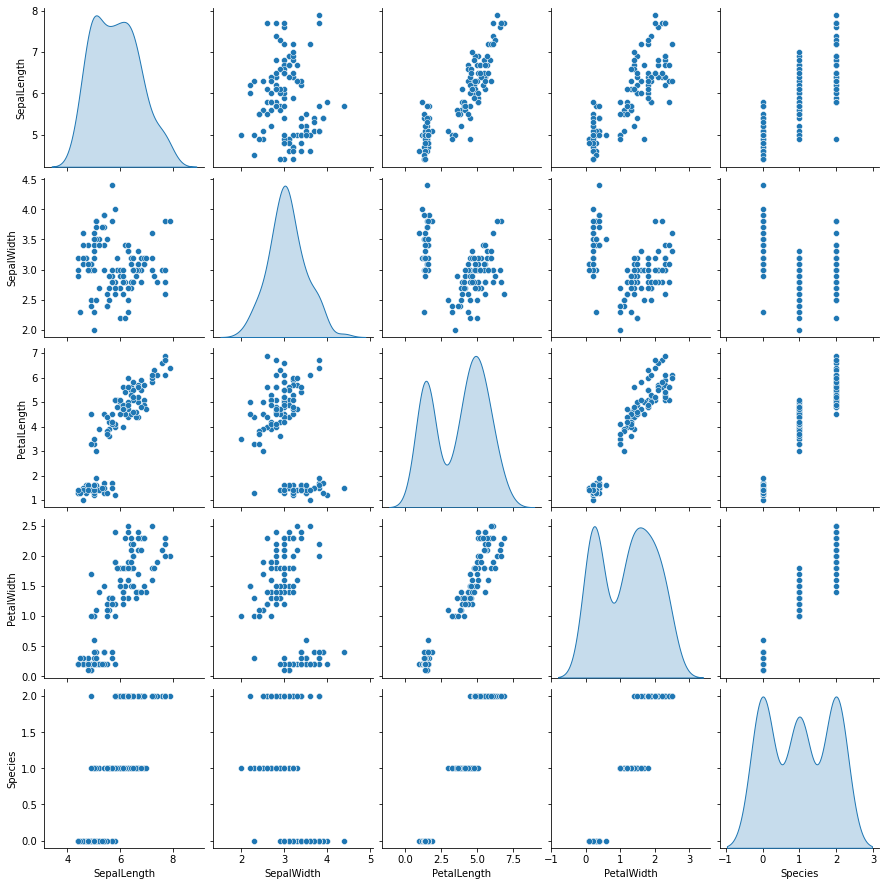

In [7]:
sns.pairplot(train_dataset[CSV_COLUMN_NAMES], diag_kind='kde')

The Pandas Dataframe describe() method is useful to check the overall statistics of the data. 

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLength,120.0,5.845000,0.868578,4.4,5.075,5.8,6.425,7.9
SepalWidth,120.0,3.065000,0.427156,2.0,2.800,3.0,3.300,4.4
PetalLength,120.0,3.739167,1.822100,1.0,1.500,4.4,5.100,6.9
PetalWidth,120.0,1.196667,0.782039,0.1,0.300,1.3,1.800,2.5
Species,120.0,1.000000,0.840168,0.0,0.000,1.0,2.000,2.0


## Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Species')
test_labels = test_features.pop('Species')

In [10]:
train_features[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [11]:
train_labels[:5]

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

### Build and Train a Deep Neural Network Clasification Model

In this case there are 4 layers. The last being the Softmax layer. In the first 3 layers we are specifying the number of neurona and the activation functions. 

In [12]:
# classification_model = tf.keras.Sequential([
#    tf.keras.layers.Dense(128, input_dim=4, activation='relu'),
#    tf.keras.layers.Dense(32, activation='relu'),
#    tf.keras.layers.Dense(3, activation='tanh'),
#    tf.keras.layers.Dense(3, activation='softmax'),
# ])

inputs = tf.keras.Input(shape=4)
layer1 = tf.keras.layers.Dense(128, activation="relu")(inputs)
layer2 = tf.keras.layers.Dense(32, activation="relu")(layer1)
layer3 = tf.keras.layers.Dense(3, activation="relu")(layer2)
outputs = tf.keras.layers.Dense(3, activation="softmax")(layer3)

classification_model = keras.Model(inputs=inputs, outputs=outputs, name="classification_model")


The model needs to be compiled prior to training. 

In [13]:
classification_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


classification_model.summary()

Model: "classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 4,879
Trainable params: 4,879
Non-trainable params: 0
_________________________________________________________________


Now, train the model using the fit() function. 

Note, the training history is being collected in the history variable. After train, this is used to review what happened during during. 

In [14]:
%%time
history = classification_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1423 - accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0474 - accuracy: 0.3500
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9879 - accuracy: 0.4667
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9445 - accuracy: 0.5917
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9109 - accuracy: 0.5583
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8910 - accuracy: 0.6833
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8785 - accuracy: 0.6917
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8681 - accuracy: 0.6917
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8618 - accuracy: 0.6917
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8563 - accuracy: 0.7000
Epoch 11/100
4/4 [===========

## Evaluating and Testing the Model

Training is complete. Now view the loss and accuracy using the history variable. 

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
95,0.616531,0.741667,95
96,0.614379,0.741667,96
97,0.612231,0.741667,97
98,0.610794,0.750000,98
99,0.608936,0.741667,99


In [16]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

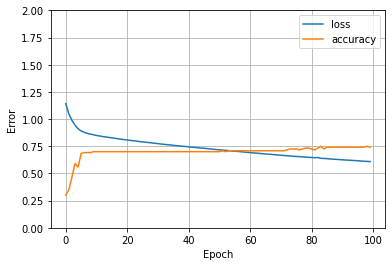

In [17]:
plot_loss(history)

Use the evaluate() function, passing in the test data, to see how well the model does at predition. 

In [18]:
test_loss, test_acc = classification_model.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

1/1 - 0s - loss: 0.6806 - accuracy: 0.6000 - 135ms/epoch - 135ms/step

Test accuracy: 0.6000000238418579

Test loss: 0.6805794835090637


## Using the Model for Inference

Use the predict() function to get predictions from the model. Recasl the last layer was the Softmax layer. The predictions are the probabilities of each example being the species (0, 1, or 2)

In [19]:
predictions = classification_model.predict(test_features)

In [20]:
predictions[:5]

array([[0.029, 0.416, 0.555],
       [0.   , 0.186, 0.814],
       [0.467, 0.316, 0.217],
       [0.018, 0.398, 0.584],
       [0.031, 0.417, 0.551]], dtype=float32)

In [21]:
test_labels[:5]

0    1
1    2
2    0
3    1
4    1
Name: Species, dtype: int64